<p> This file aims to deepen the data analysis of the Uber dataset, focusing on the exploration of charts and relationships between variables in a visual manner. It will build upon the work done in Part 1, reusing functions and transformations to ensure efficiency and consistency in the analysis.</p>

<p> Part 2 seeks to provide a more visual and interactive approach by generating insights through advanced charts to understand patterns, correlations, and trends. This exploratory data analysis (EDA) focuses on peak periods associated with ride cancellations, aiming to identify key indicators and suggest actionable improvements to reduce unfavorable metrics. By analyzing trends and drivers behind cancellations during high-demand times, the study provides insights for optimizing operations and enhancing the overall customer and driver experience.</p>

Link to Part 1 File: [Uber Data Analysis - Part 1](https://github.com/carolinepena/Getting-Started-with-Python/blob/main/Data%20Exploration/Uber%20Data%20Analytics%20Dashboard.ipynb)

In [1]:
# Setting up the environment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

print("Setup Complete")

warnings.filterwarnings("ignore") # ignore all warnings

Setup Complete


In [2]:
# Load the Dataset and configurations made in the Part 1
filepath =  "../input/uber-ride-analytics-dashboard/ncr_ride_bookings.csv"
uber_data = pd.read_csv(filepath)

In [3]:
uber_data['Reason for cancelling by Customer'] = uber_data['Reason for cancelling by Customer'].replace('0', 'Unknow')
uber_data['Driver Cancellation Reason'] = uber_data['Driver Cancellation Reason'].replace('0', 'Unknow')
uber_data['Incomplete Rides Reason'] = uber_data['Incomplete Rides Reason'].replace('0', 'Unknow')
uber_data['Payment Method'] = uber_data['Payment Method'].replace('0', 'Unknow')
uber_data['Avg VTAT'] = uber_data['Avg VTAT'].fillna(0)
uber_data['Avg CTAT'] = uber_data['Avg CTAT'].fillna(0)
uber_data['Cancelled Rides by Customer'] = uber_data['Cancelled Rides by Customer'].fillna(0)
uber_data['Cancelled Rides by Driver'] = uber_data['Cancelled Rides by Driver'].fillna(0)
uber_data['Incomplete Rides'] = uber_data['Incomplete Rides'].fillna(0)
uber_data['Booking Value'] = uber_data['Booking Value'].fillna(0)
uber_data['Ride Distance'] = uber_data['Ride Distance'].fillna(0)
uber_data['Driver Ratings'] = uber_data['Driver Ratings'].fillna(0)
uber_data['Customer Rating'] = uber_data['Customer Rating'].fillna(0)

In [4]:
uber_data['Date'] = pd.to_datetime(uber_data['Date'], errors='coerce')
uber_data['Time'] = pd.to_datetime(uber_data['Time'], errors='coerce')
uber_data['Booking ID'] = uber_data['Booking ID'].astype('string')
uber_data['Booking Status'] = uber_data['Booking Status'].astype('string')
uber_data['Customer ID'] = uber_data['Customer ID'].astype('string')
uber_data['Vehicle Type'] = uber_data['Vehicle Type'].astype('string')
uber_data['Pickup Location'] = uber_data['Pickup Location'].astype('string')
uber_data['Drop Location'] = uber_data['Drop Location'].astype('string')
uber_data['Driver Cancellation Reason'] = uber_data['Driver Cancellation Reason'].astype('string')
uber_data['Cancelled Rides by Customer'] = uber_data['Cancelled Rides by Customer'].astype('int')
uber_data['Reason for cancelling by Customer'] = uber_data['Reason for cancelling by Customer'].astype('string')
uber_data['Cancelled Rides by Driver'] = uber_data['Cancelled Rides by Driver'].astype('int')
uber_data['Driver Cancellation Reason'] = uber_data['Driver Cancellation Reason'].astype('string')
uber_data['Incomplete Rides'] = uber_data['Incomplete Rides'].astype('int')
uber_data['Incomplete Rides Reason'] = uber_data['Incomplete Rides Reason'].astype('string')
uber_data['Booking Value'] = uber_data['Booking Value'].astype('int')
uber_data['Payment Method'] = uber_data['Payment Method'].astype('string')

In [5]:
uber_data.head(10)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,2025-08-31 12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,0.0,0.0,...,<NA>,0,<NA>,0,<NA>,0,0.00,0.0,0.0,<NA>
1,2024-11-29,2025-08-31 18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,<NA>,0,<NA>,1,Vehicle Breakdown,237,5.73,0.0,0.0,UPI
2,2024-08-23,2025-08-31 08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,<NA>,0,<NA>,0,<NA>,627,13.58,4.9,4.9,Debit Card
3,2024-10-21,2025-08-31 17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,<NA>,0,<NA>,0,<NA>,416,34.02,4.6,5.0,UPI
4,2024-09-16,2025-08-31 22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,<NA>,0,<NA>,0,<NA>,737,48.21,4.1,4.3,UPI
5,2024-02-06,2025-08-31 09:44:56,"""CNR4096693""",Completed,"""CID4670564""",Auto,AIIMS,Narsinghpur,5.1,18.1,...,<NA>,0,<NA>,0,<NA>,316,4.85,4.1,4.6,UPI
6,2024-06-17,2025-08-31 15:45:58,"""CNR2002539""",Completed,"""CID6800553""",Go Mini,Vaishali,Punjabi Bagh,7.1,20.4,...,<NA>,0,<NA>,0,<NA>,640,41.24,4.0,4.1,UPI
7,2024-03-19,2025-08-31 17:37:37,"""CNR6568000""",Completed,"""CID8610436""",Auto,Mayur Vihar,Cyber Hub,12.1,16.5,...,<NA>,0,<NA>,0,<NA>,136,6.56,4.4,4.2,UPI
8,2024-09-14,2025-08-31 12:49:09,"""CNR4510807""",No Driver Found,"""CID7873618""",Go Sedan,Noida Sector 62,Noida Sector 18,0.0,0.0,...,<NA>,0,<NA>,0,<NA>,0,0.00,0.0,0.0,<NA>
9,2024-12-16,2025-08-31 19:06:48,"""CNR7721892""",Incomplete,"""CID5214275""",Auto,Rohini,Adarsh Nagar,6.1,26.0,...,<NA>,0,<NA>,1,Other Issue,135,10.36,0.0,0.0,Cash


In [6]:
# Import new libraries
import matplotlib.ticker as ticker # Changed tickers
import plotly.express as px # Create interactive charts 

<h4>Identifying peak windows by day and time </h4>

In [7]:
# Extract Week Day ans hour
uber_data['day_week'] = uber_data['Date'].dt.dayofweek
uber_data['day_week_name'] = uber_data['Date'].dt.day_name()
uber_data['Time'] = pd.to_datetime(uber_data['Time'], errors='coerce')
uber_data['hour'] = uber_data['Time'].dt.hour
uber_data.head(5)

pivot = uber_data.groupby(['day_week', 'day_week_name', 'hour'])['Booking ID'].nunique().reset_index()
pivot = pivot.pivot(index='day_week', columns='hour', values='Booking ID').fillna(0)


day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
pivot.index = [pd.to_datetime(str(2024) + '-01-0' + str(i+1)).day_name() for i in pivot.index]
pivot = pivot.reindex(day_order).fillna(0)

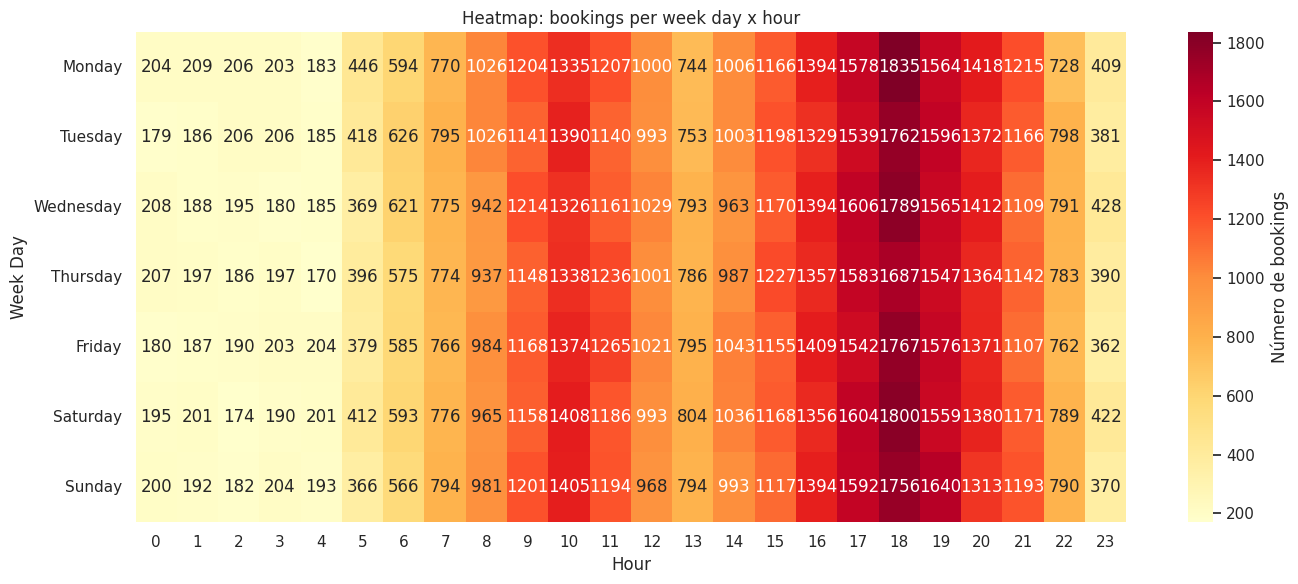

In [8]:
plt.figure(figsize=(14,6))
sns.set_theme(style='white')
ax = sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlOrRd', cbar_kws={'label': 'Número de bookings'})
ax.set_title('Heatmap: bookings per week day x hour')
ax.set_xlabel('Hour')
ax.set_ylabel('Week Day')
plt.tight_layout()
plt.savefig('heatmap_hour_day.png', dpi=150)
plt.show()

<p>Analyzing the booking heatmap by day of the week and hour, it is evident that the period of highest intensity occurs between <strong>5 PM and 7 PM</strong>. Other consistent peak windows for rides are from <strong>9 AM to 11 AM</strong>, from <strong>3 PM to 5 PM</strong>, and from <strong>7 PM to 9 PM</strong>.</p>

<p>To address these peak demand periods, it could be strategic for Uber to implement incentives for drivers to ensure a higher availability during these times.</p>

<h4>Analysis of Cancellation Reasons</h4>

In [9]:
uber_data['Driver Cancellation Reason'].value_counts()

Driver Cancellation Reason
Customer related issue                 6837
The customer was coughing/sick         6751
Personal & Car related issues          6726
More than permitted people in there    6686
Name: count, dtype: Int64

In [10]:
uber_data['Reason for cancelling by Customer'].value_counts()

Reason for cancelling by Customer
Wrong Address                                   2362
Change of plans                                 2353
Driver is not moving towards pickup location    2335
Driver asked to cancel                          2295
AC is not working                               1155
Name: count, dtype: Int64

In [11]:
uber_data['Group of Reasons'] = uber_data['Driver Cancellation Reason'].fillna('') + uber_data['Reason for cancelling by Customer'].fillna('')
uber_data['Group of Reasons'] = uber_data['Group of Reasons'].replace('', 'Unknown')
uber_data['Group of Reasons'].value_counts()
temp_data = uber_data[uber_data['Group of Reasons'] != 'Unknown']
# Idenfying who is responsible for the cancellation
uber_data['Cancelled by'] = temp_data.apply(
    lambda x: 'Customer' if pd.notna(x['Reason for cancelling by Customer'])
    else 'Driver',
    axis = 1
)

temp_data = uber_data[uber_data['Group of Reasons'] != 'Unknown']

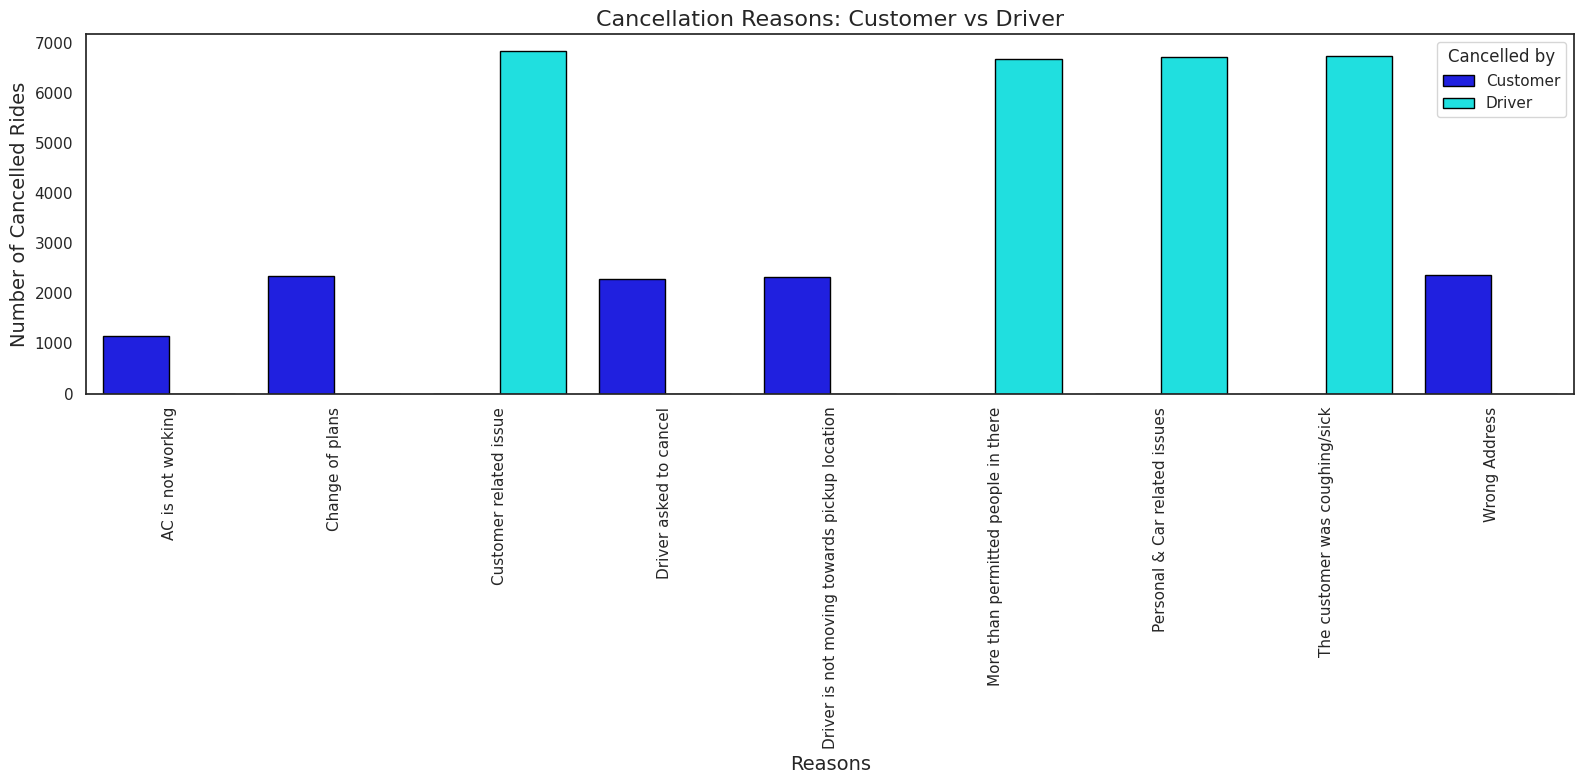

In [12]:
grouped_data = uber_data.groupby(['Group of Reasons', 'Cancelled by']).size().unstack().fillna(0).astype(int)
grouped_data = grouped_data.reset_index()
grouped_data = grouped_data.melt(
    id_vars='Group of Reasons',
    var_name='Cancelled by',
    value_name='Number of Cancelled Rides'
)

plt.figure(figsize=(16, 8))
sns.set_theme(style='white')

ax = sns.barplot(
    data=grouped_data,
    x='Group of Reasons',
    y='Number of Cancelled Rides',
    hue='Cancelled by',
    palette=['blue', 'cyan'],
    edgecolor='black' 
)

plt.title('Cancellation Reasons: Customer vs Driver', fontsize=16)
plt.ylabel('Number of Cancelled Rides', fontsize=14)
plt.xlabel('Reasons', fontsize=14)
plt.legend(title='Cancelled by', loc='upper right')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('barplot_Cancellation_Reasons_with_edges.png', dpi=150)
plt.show()

<p>Analyzing the graph, it is evident that the main reasons for ride cancellations, as reported by drivers, include customer-related issues, customers coughing or appearing sick, personal and car-related issues, and exceeding the permitted number of passengers in the vehicle. To address these concerns and reduce cancellations, several actions can be considered, for example:</p>

<ul>
    <li>Create awareness campaigns aimed at customers to address common issues, such as exceeding passenger limits. These campaigns can emphasize booking guidelines and vehicle capacity to ensure compliance.</li>
    <li>Establish vehicle maintenance programs to minimize issues like malfunctioning air conditioning ("AC is not working") and car-related problems. This will improve the ride experience for both drivers and passengers.</li>
    <li>Develop an efficient system to improve communication between drivers and customers. For example, implement features that flag mismatches or concerns between customer expectations and driver capabilities before ride confirmation. This can prevent misunderstandings and increase satisfaction for both parties.</li>
</ul>

<h4>Analysis of Cancellation Reasons by time</h4>

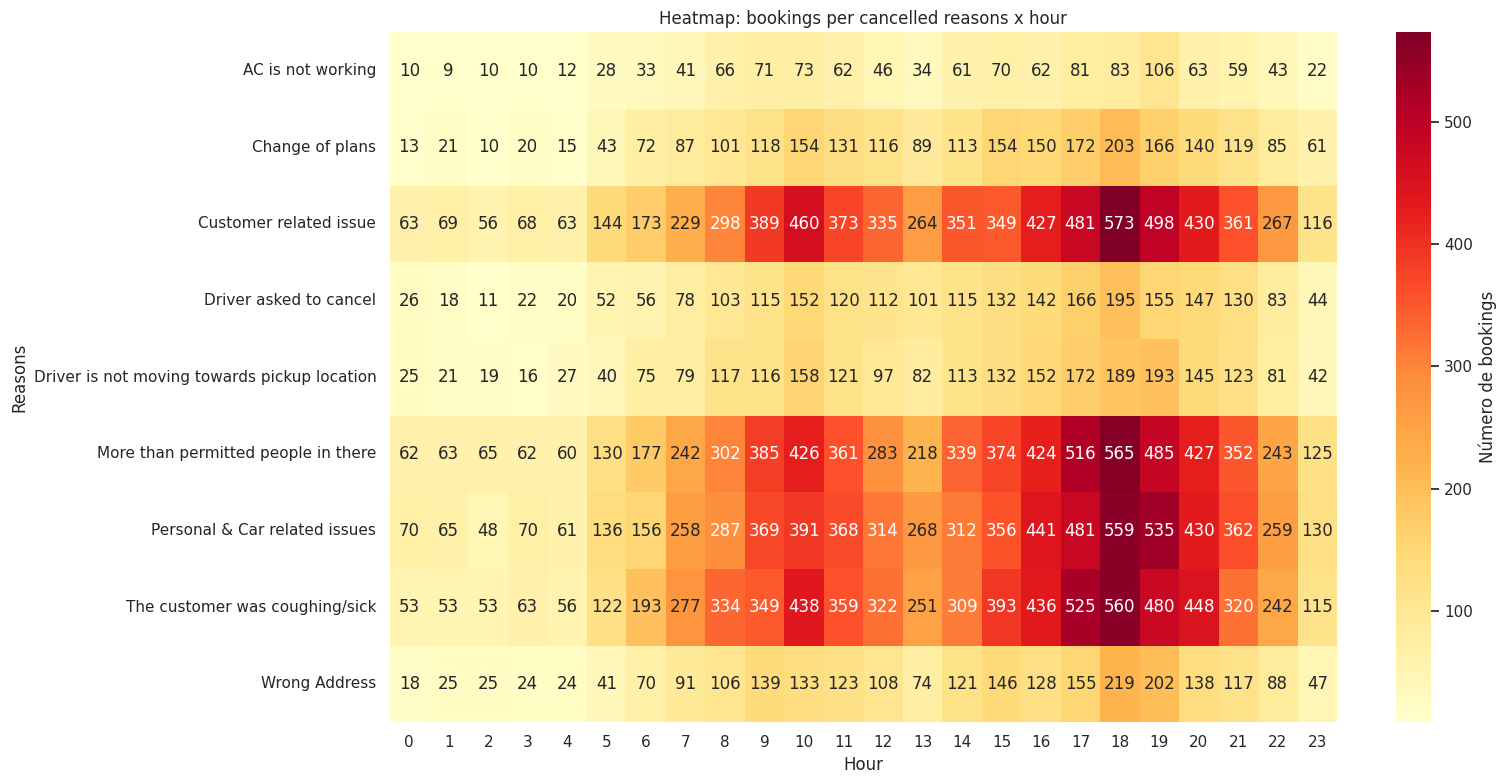

In [13]:
pivot = temp_data.groupby(['Group of Reasons', 'Cancelled by', 'hour'])['Booking ID'].nunique().reset_index()
pivot = pivot.pivot(index='Group of Reasons', columns='hour', values='Booking ID').fillna(0)

plt.figure(figsize=(16, 8))
sns.set_theme(style='white')
ax = sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlOrRd', cbar_kws={'label': 'Número de bookings'})
ax.set_title('Heatmap: bookings per cancelled reasons x hour')
ax.set_xlabel('Hour')
ax.set_ylabel('Reasons')
plt.tight_layout()
plt.savefig('heatmap_hour_reasons.png', dpi=150)
plt.show()

<p>By analyzing the "Analysis of Cancellation Reasons by Time" graph and comparing it with the "Heatmap: Bookings per Weekday x Hour" it is evident that the time zones overlap. This indicates that the periods with the highest ride demand also experience elevated incidents and cancellations. This pattern may arise due to various factors, such as drivers rushing to maximize the number of rides and neglecting basic considerations, or customers—being in a hurry—inputting incorrect information into the app.</p>

In [14]:
uber_data.head(5)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,day_week,day_week_name,hour,Group of Reasons,Cancelled by
0,2024-03-23,2025-08-31 12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,0.0,0.0,...,0,0.00,0.0,0.0,<NA>,5,Saturday,12,Unknown,NaN
1,2024-11-29,2025-08-31 18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,237,5.73,0.0,0.0,UPI,4,Friday,18,Unknown,NaN
2,2024-08-23,2025-08-31 08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,627,13.58,4.9,4.9,Debit Card,4,Friday,8,Unknown,NaN
3,2024-10-21,2025-08-31 17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,416,34.02,4.6,5.0,UPI,0,Monday,17,Unknown,NaN
4,2024-09-16,2025-08-31 22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,737,48.21,4.1,4.3,UPI,0,Monday,22,Unknown,NaN


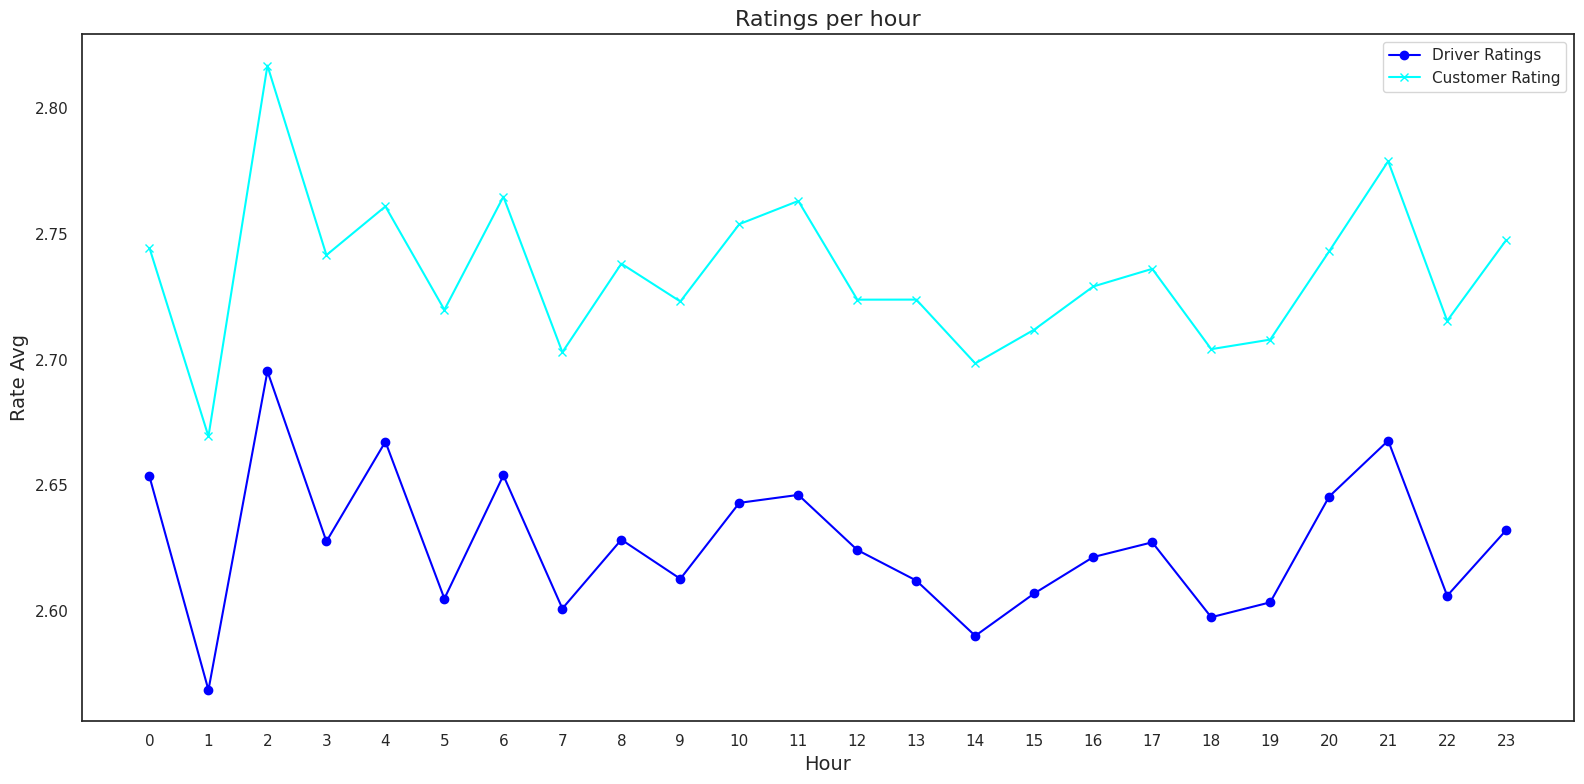

In [15]:
driver_rate_by_hour = uber_data.groupby('hour')['Driver Ratings'].mean()
customer_rate_by_hour = uber_data.groupby('hour')['Customer Rating'].mean()

plt.figure(figsize=(16, 8))
plt.plot(driver_rate_by_hour, label='Driver Ratings', color='blue', marker='o')
plt.plot(customer_rate_by_hour, label='Customer Rating', color='cyan', marker='x')
plt.title('Ratings per hour', fontsize=16)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Rate Avg', fontsize=14)
plt.legend(loc='upper right')
plt.xticks(range(24))  # Exibir todas as horas
plt.tight_layout()
plt.savefig('ratings_by_hour.png', dpi=150)
plt.show()

<p>Analyzing and comparing the average ratings of drivers and customers throughout the hours of the day, it’s possible to affirm that the behavior is generally reciprocal. In other words, customer and driver ratings tend to mirror each other, although customer ratings are consistently higher than those given by drivers. This disparity could be linked to the fact that drivers are more likely to cancel rides, which may lead to customer dissatisfaction.</p>
<p>When comparing this with the other graphs, "Analysis of Cancellation Reasons by Time" and "Heatmap: Bookings per Weekday x Hour," it becomes evident that during peak periods, ratings experience a slight drop, particularly between 6 PM and 7 PM.</p>

<p>With these analyses combined, it becomes clear that a detailed segment analysis is necessary during peak periods. This should be complemented by assessments of both drivers and customers to identify the key reasons behind cancellations and dissatisfaction. Addressing these issues systematically can positively impact performance metrics, enhance customer experience, and optimize driver operations.</p>

In [16]:
output_file = 'ncr_ride_bookings_eda.csv'
uber_data.to_csv(output_file, index=False)
print(f"New Dataset saved as {output_file}")

New Dataset saved as ncr_ride_bookings_eda.csv
